In [3]:
import vice
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math as m

In [2]:
fname = '../src/data/migration_outputs/diffusion/insideout/powerlaw.vice/zone80.vice/attributes/tau_star.obj'
with open(fname, "rb") as f:
    obj = pickle.load(f)
print(obj)
hist = vice.history('../src/data/migration_outputs/diffusion/insideout/powerlaw.vice/zone80')
# print(hist['mgas'])

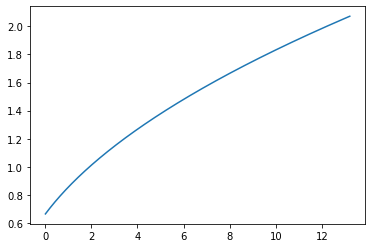

In [3]:
tarr = np.arange(0, 13.22, 0.01)
sfe = [obj(tarr[i], hist['mgas'][i]) for i in range(tarr.shape[0])]
plt.plot(tarr[1:], sfe[1:])

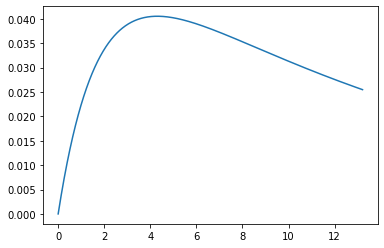

In [4]:
plt.plot(tarr, hist['sfr'])
plt.show()

In [23]:
# fname = '../src/data/migration_outputs/sfetest.vice/zone4.vice/attributes/tau_star.obj'
# with open(fname, "rb") as f:
#     obj = pickle.load(f)
# print(obj)
# print(obj._sfe)
hist = vice.history('../src/data/migration_outputs/sfetest.vice/zone4')
# print(hist['mgas'])

In [22]:
tarr = np.arange(0, 13.22, 0.01)
sfe = [obj(tarr[i], hist['mgas'][i]) for i in range(tarr.shape[0])]
plt.plot(tarr[1:], sfe[1:])

NameError: name 'obj' is not defined

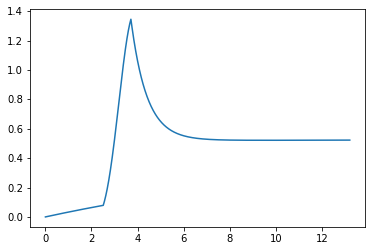

In [24]:
plt.plot(tarr, hist['sfr'])
plt.show()

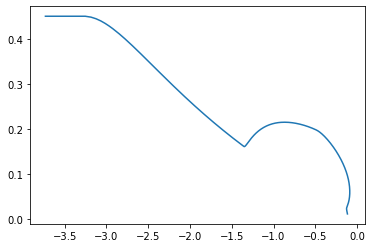

In [25]:
plt.plot(hist['[fe/h]'], hist['[o/fe]'])
plt.show()

In [41]:
fname = '../src/data/migration_outputs/post-process/conroy22_insideout/powerlaw.vice/zone80.vice/attributes/tau_star.obj'
with open(fname, "rb") as f:
    obj = pickle.load(f)
print(obj)
hist = vice.history('../src/data/migration_outputs/post-process/conroy22_insideout/powerlaw.vice/zone80')

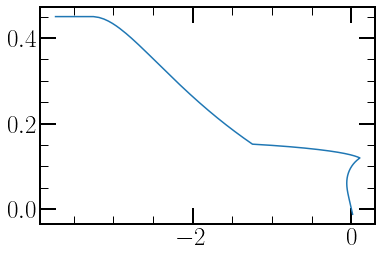

In [42]:
plt.plot(hist['[fe/h]'], hist['[o/fe]'])
plt.show()

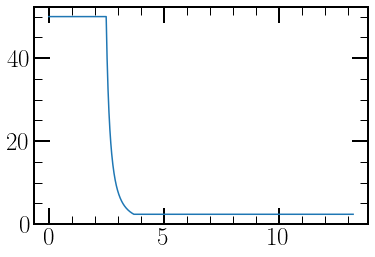

In [43]:
tarr = np.arange(0, 13.22, 0.01)
sfe = [obj(tarr[i], hist['mgas'][i]) for i in range(tarr.shape[0])]
plt.plot(tarr[1:], sfe[1:])

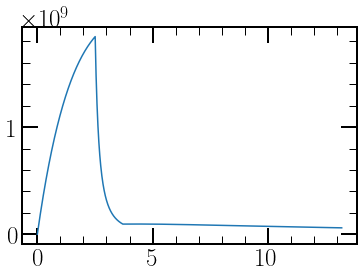

In [44]:
plt.plot(tarr, hist['mgas'])
plt.show()

## Test Conroy+ 22 in singlezone mode

In [9]:
def broken_exp(time):
    if time < 5:
        return 5
    else:
        return 5 * m.exp(-(time - 5)/15)
    
def conroy22_tau_star(time):
    if time < 2.5:
        return 50
    elif time >= 2.5 and time < 3.7:
        return 50 / ((1 + 3*(time-2.5))**2)
    else:
        return 2.36
    
tmax = 13.2
dt = 0.01
simtime = np.arange(0, tmax+dt, dt) # Gyr

conroy22_ifr = vice.singlezone(name='../src/data/one_zone_outputs/conroy22_ifr', func=broken_exp, mode='ifr', tau_star=conroy22_tau_star, Mg0=0, RIa='plaw', delay=0.04, dt=dt)
conroy22_ifr.run(simtime, overwrite=True)

conroy22_sfr = vice.singlezone(name='../src/data/one_zone_outputs/conroy22_sfr', func=broken_exp, mode='sfr', tau_star=conroy22_tau_star, Mg0=0, RIa='plaw', delay=0.04, dt=dt)
conroy22_sfr.run(simtime, overwrite=True)

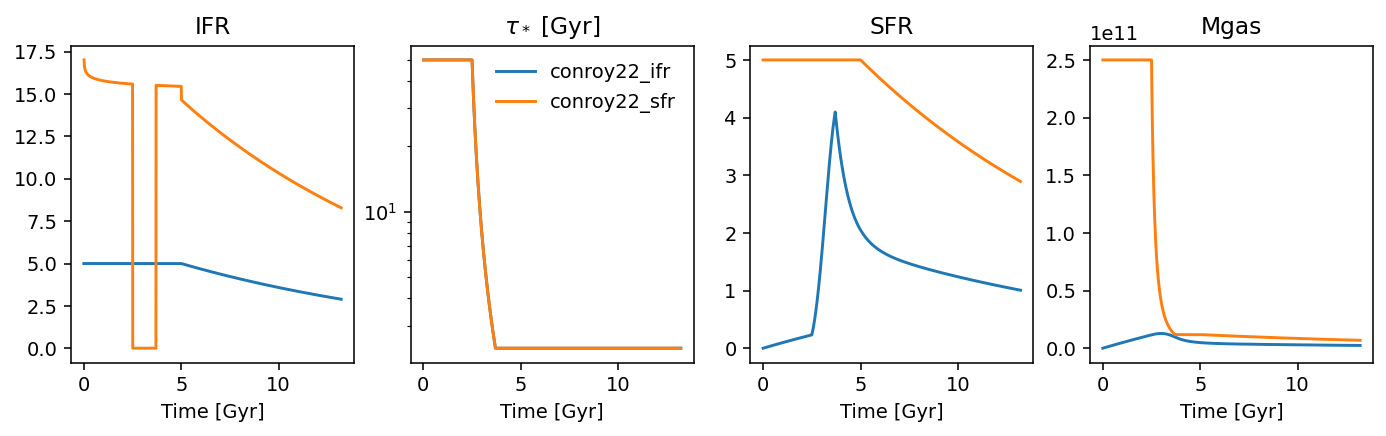

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), dpi=140)
runs = ['conroy22_ifr', 'conroy22_sfr']
output_dir = '../src/data/one_zone_outputs'
for run in runs:
    hist = vice.history('/'.join((output_dir, run)))
    t = hist['time']
    axs[0].plot(t, hist['ifr'])
    axs[1].plot(t[1:], [hist['mgas'][i+1] / hist['sfr'][i+1] * 1e-9 for i in range(len(t)-1)], label=run)
    axs[2].plot(t, hist['sfr'])
    axs[3].plot(t, hist['mgas'])
axs[0].set_title('IFR')
axs[0].set_xlabel('Time [Gyr]')
axs[1].set_title(r'$\tau_*$ [Gyr]')
axs[1].set_yscale('log')
axs[1].set_xlabel('Time [Gyr]')
axs[2].set_title('SFR')
axs[2].set_xlabel('Time [Gyr]')
axs[3].set_title('Mgas')
axs[3].set_xlabel('Time [Gyr]')
axs[1].legend(frameon=False)
plt.show()

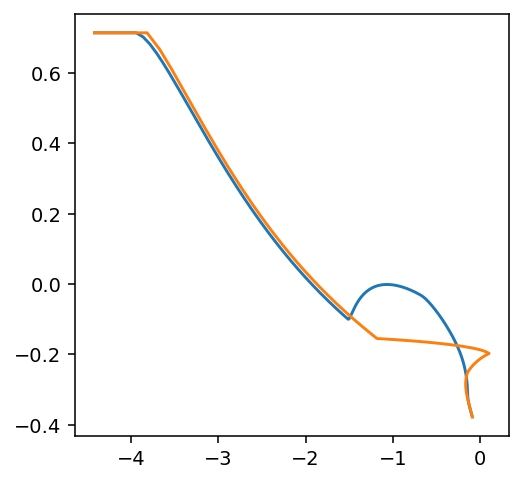

In [11]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
runs = ['conroy22_ifr', 'conroy22_sfr']
output_dir = '../src/data/one_zone_outputs'
for run in runs:
    hist = vice.history('/'.join((output_dir, run)))
    ax.plot(hist['[fe/h]'], hist['[o/fe]'])
plt.show()

## Simple multizone test

In [29]:
hist = vice.history('../src/data/migration_outputs/sfetest.vice/zone4')

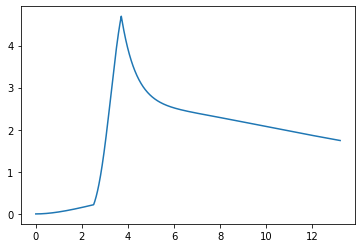

In [33]:
plt.plot(tarr, hist['sfr'])
plt.show()

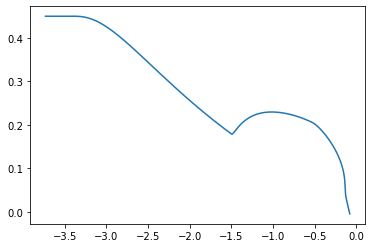

In [31]:
plt.plot(hist['[fe/h]'], hist['[o/fe]'])
plt.show()